In [ ]:
!pip install imblearn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/UPI fraud detection/PS_20174392719_1491204439457_log.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.shape

(6362620, 11)

In [ ]:
data.type.value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [ ]:
data['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [ ]:
data[data['isFraud']==1].head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [ ]:
data['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [ ]:
data.drop('isFlaggedFraud',axis=1,inplace=True)

In [ ]:
data=data[data.type.isin(['TRANSFER','PAYMENT'])]
data.shape

(2684404, 10)

In [ ]:
data[data.duplicated].value_counts()

,,,,,,,,,,count
step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,


In [ ]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
data['hour'] = data['step'] % 24  # Extract hour from step (since 1 step = 1 hour)
data['is_night'] = data['hour'].apply(lambda x: 1 if x < 6 else 0)  # Flag night transactions

In [ ]:
data['is_night']

,is_night
0,1
1,1
2,1
3,1
4,1
...,...
6362615,0
6362616,0
6362617,0
6362618,0


In [ ]:
data['amount_ratio']=data['amount'] / (data['oldbalanceOrg'] + 1)

In [ ]:
data['sender_balance_change'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['receiver_balance_change'] = data['newbalanceDest'] - data['oldbalanceDest']

In [ ]:
data['orig_balance_zero']=(data['oldbalanceOrg']==0).astype(int)
data['dest_balance_zero']=(data['oldbalanceDest']==0).astype(int)


In [ ]:
df = pd.get_dummies(data, columns=['type'], drop_first=True)
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,1,1,0.057834,9839.64,0.0,0,1,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1,1,0.087731,1864.28,0.0,0,1,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,1,1,0.994505,181.00,0.0,0,1,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,1,1,0.994505,181.00,-21182.0,0,0,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,1,1,0.280788,11668.14,0.0,0,1,False,False,True,False


In [ ]:
df['type_TRANSFER'] = df['type_TRANSFER'].astype(int)
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,1,1,0.057834,9839.64,0.0,0,1,False,False,True,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1,1,0.087731,1864.28,0.0,0,1,False,False,True,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,1,1,0.994505,181.00,0.0,0,1,False,False,False,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,1,1,0.994505,181.00,-21182.0,0,0,True,False,False,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,1,1,0.280788,11668.14,0.0,0,1,False,False,True,0


In [ ]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
df.columns


Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'hour', 'is_night', 'amount_ratio',
       'sender_balance_change', 'receiver_balance_change', 'orig_balance_zero',
       'dest_balance_zero', 'type_TRANSFER'],
      dtype='object')

<Axes: >

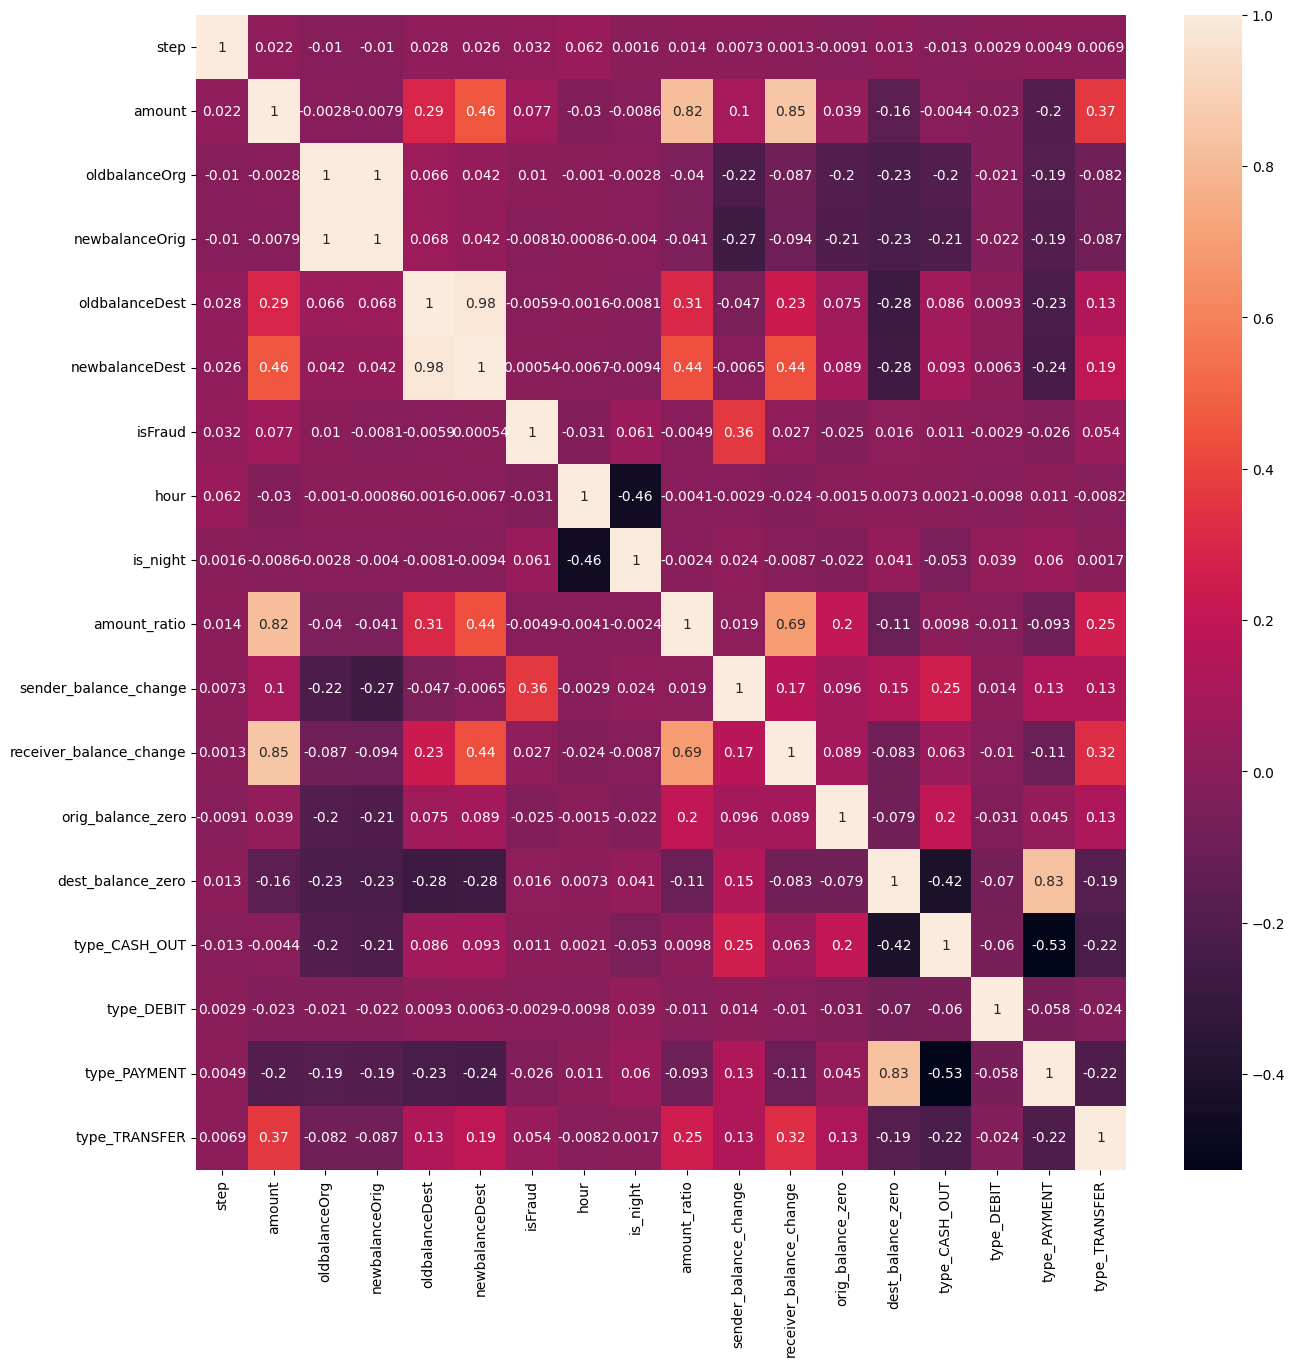

In [ ]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr ,annot=True)

In [ ]:
X=df.drop('isFraud',axis=1)
y=df['isFraud']

In [ ]:
y.value_counts()

,count
isFraud,
0,6354407
1,8213


In [ ]:
print(X.shape)
print(y.shape)

(6362620, 17)
(6362620,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,
                                               random_state=42,
                                               stratify=y,
                                               shuffle=True)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4453834, 17)
(1908786, 17)
(4453834,)
(1908786,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train_scaled,y_train)
ypred1=model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report

acc_score=accuracy_score(y_test,ypred1)
print(f"accuracy score :{acc_score} ")
print()
print("Confusion matrix :")
print(confusion_matrix(y_test,ypred1))
print()
print("Classification Report :")
print(classification_report(y_test,ypred1))


accuracy score :0.9993079370867137 

Confusion matrix :
[[1906204     118]
 [   1203    1261]]

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.91      0.51      0.66      2464

    accuracy                           1.00   1908786
   macro avg       0.96      0.76      0.83   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_train_smote,y_train_smote=smote.fit_resample(X_train_scaled,y_train)


In [ ]:
print(X_train_smote.shape)
print(y_train_smote.shape)
print(y_train_smote.value_counts())

(8896170, 17)
(8896170,)
isFraud
0    4448085
1    4448085
Name: count, dtype: int64


In [ ]:
model.fit(X_train_smote,y_train_smote)
smote_predict=model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report

acc_score=accuracy_score(y_test,smote_predict)
print(f"accuracy score :{acc_score} ")
print()
print("Confusion matrix :")
print(confusion_matrix(y_test,smote_predict))
print()
print("Classification Report :")
print(classification_report(y_test,smote_predict))


accuracy score :0.9532530100283636 

Confusion matrix :
[[1817189   89133]
 [     97    2367]]

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1906322
           1       0.03      0.96      0.05      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.96      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [ ]:
import pickle

with open('/content/drive/MyDrive/UPI fraud detection/model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(sampling_strategy='minority')),
    ('model', LogisticRegression(max_iter=1000))
])


NameError: name 'StandardScaler' is not defined

In [ ]:
# train_fraud_pipeline.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report, confusion_matrix
import pickle

class FraudPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_columns_ = None  # will store columns after fit

    def fit(self, X, y=None):
        X_transformed = self._transform_features(X.copy())
        self.feature_columns_ = X_transformed.columns  # store columns
        return self

    def transform(self, X):
        X = self._transform_features(X.copy())

        # Only align columns if feature_columns_ is set (after fit)
        if self.feature_columns_ is not None:
            # add missing columns as 0
            for col in self.feature_columns_:
                if col not in X.columns:
                    X[col] = 0
            # keep only training columns
            X = X[self.feature_columns_]

        return X

    def _transform_features(self, X):
        # Drop unused columns
        X = X.drop(['isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1, errors='ignore')

        # Feature engineering
        X['hour'] = X['step'] % 24
        X['is_night'] = (X['hour'] < 6).astype(int)
        X['amount_ratio'] = X['amount'] / (X['oldbalanceOrg'] + 1)
        X['sender_balance_change'] = X['oldbalanceOrg'] - X['newbalanceOrig']
        X['receiver_balance_change'] = X['newbalanceDest'] - X['oldbalanceDest']
        X['orig_balance_zero'] = (X['oldbalanceOrg'] == 0).astype(int)
        X['dest_balance_zero'] = (X['oldbalanceDest'] == 0).astype(int)

        # One-hot encode type
        X = pd.get_dummies(X, columns=['type'], drop_first=True)
        if 'type_TRANSFER' not in X.columns:
            X['type_TRANSFER'] = 0

        return X



data = pd.read_csv("/content/drive/MyDrive/UPI fraud detection/PS_20174392719_1491204439457_log.csv")

X = data.drop("isFraud", axis=1)
y = data["isFraud"]

# Stratified Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# 🧩 Step 3: Build Full Pipeline
pipeline = Pipeline([
    ('preprocess', FraudPreprocessor()),   # feature creation
    ('scaler', StandardScaler()),          # normalization
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),  # balance minority class
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))  # classifier
])

# 🧩 Step 4: Train
pipeline.fit(X_train, y_train)

# 🧩 Step 5: Evaluate
y_pred = pipeline.predict(X_test)
print("✅ Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


✅ Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1906322
           1       0.03      0.96      0.05      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.96      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786

✅ Confusion Matrix:
[[1817105   89217]
 [     97    2367]]


In [ ]:
input_data = pd.DataFrame([{
    'step': 3,
    'amount': 9000,
    'oldbalanceOrg': 170136.0,
    'newbalanceOrig': 160296.36,
    'oldbalanceDest': 0.0,
    'newbalanceDest': 0.0,
    'type': 'TRANSFER',  # raw type column, preprocessor handles encoding
    'isFlaggedFraud': 0,
    'nameOrig': 'C123',
    'nameDest': 'M456'
}])

pipeline.fit(X_train, y_train)
prediction = pipeline.predict(input_data)
print(f"Prediction: {prediction[0]}")

Prediction: 0


In [ ]:
# Training with SMOTE
preprocessor = FraudPreprocessor()
X_train_transformed = preprocessor.fit_transform(X_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_res, y_train_res)

# Save pipeline (preprocessor + scaler + model)
import pickle
with open("/content/drive/MyDrive/UPI fraud detection/pipeline.pkl", "wb") as f:
    pickle.dump((preprocessor, scaler, model), f)


In [ ]:

with open("/content/drive/MyDrive/UPI fraud detection/fraud_detection_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("✅ Pipeline saved as fraud_detection_pipeline.pkl")


✅ Pipeline saved as fraud_detection_pipeline.pkl
